# Data Structures and Abstraction in Python

In [1]:
import random

import matplotlib as mpl
import matplotlib.pyplot as plt

from typing import List

%matplotlib notebook

In [2]:
mpl.style.use('fivethirtyeight')

## Functions

Functions are one of the first data structures that we learn in computer science. They represent procedural abstraction, where we would like to encapsulate some operation in a repeatable fashion. We have already used functions in this course, anywhere from Python's built in `print()` to the `load_data()` which I defined for you in our visualization homework. 

### Hello Functions

The main goal of procedural abstraction is to prevent us from having to repeat ourselves. Let's say that I would like to print to `stdout` the phrase `"Hello, <name>!` to several friends. I could do something like this:

In [3]:
print("Hello, Jacob!")
print("Hello, Allie!")
print("Hello, Jean!")

Hello, Jacob!
Hello, Allie!
Hello, Jean!


I could continue retyping the pattern `print("Hello <friend_name>!")` until I get carpal tunnel syndrome. Totally valid. However, I will probably get tired of this, and I will likely make a typo somewhere, creating a bug in my program. Instead, I could write a function that abstracts away the idea of this option, making my life a lot easier:

In [4]:
def hello(name):
    """Greet a person with a given `name`
    
    This is a void function, meaning that
    it does not return a value. It takes a single
    parameter, `name`, and passes that to Python's
    built in `print()` function. This abstracts 
    
    Args:
        name (str): the person to greet.
    """
    print(f"Hello, {name}!")

In [5]:
hello("Jacob")
hello("Allie")
hello("Jean")

Hello, Jacob!
Hello, Allie!
Hello, Jean!


Now, all we have to do is pass in the name of our friend as a `str` to our function `hello()`. Looking at the function definition above, you see that there is a `name` argument. This allows us to vary our program's functionality depending on the argument we pass to `hello()`. We call this parametrizing our function over `name`. 

Functions can have 0 to many arguments. Say we would like to add two parameters:

In [6]:
def add(param0, param1):
    """Add two parameters
    
    This function takes two arguments and
    calls Python's `+` operator to act on
    those two parameters.
    
    Args:
        param0: the left parameter of `+`
        param1: the right parameter of `+`
        
    Returns:
        the result of `+` on the given types
    """
    return param0 + param1

In [7]:
# Python docstrings tho
# add?

In [8]:
# Calling `add` on two integers
add(1, 2)

3

In [9]:
# Calling `add` on a float and int
add(1.0, 2)

3.0

In [10]:
# Calling `add` on two str
add('hello', ' world')

'hello world'

In [11]:
# Calling `add` on a str and an int?
# add("hello", 1)

### Three Things to Consider with Functions:


1. A function definition is like a small program and calling the function is the same as running this "small program"
2. The arguments of a function are the input of the small program, and its behavior depends upon them. 
3. Functions encapsulate state of your programs

## Classes 

Classes allow us to maintain state while including some functionality related to that state.

In [12]:
class Coordinate:
    """Euclidean coordinate
    
    Args:
        x: x-dimension location
        y: y-dimension location
        z: z-dimension location
    """
    
    def __init__(self, x, y, z):
        self.x = x
        self.y = y
        self.z = z
        
    def __repr__(self):
        return f'Coordinate(x={self.x}, y={self.y}, z={self.z})'
    
    def __eq__(self, other):
        """Check if some `other` Coordinate is equal to this one"""
        return self.x == other.x and self.y == other.y and self.z == other.z
        
    def translate_x(self, direction):
        """Translate in the x `direction`"""
        self.x += direction
        
    def translate_y(self, direction):
        """Translate in the y `direction`"""
        self.y += direction
        
    def translate_z(self, direction):
        """Translate in the z `direction`"""
        self.z += direction
        
    def get_position(self):
        return (self.x, self.y, self.z)

In [13]:
def create_random_coordinate(low: int = 0, high: int = 100) -> Coordinate:
    """Create a random coordinate
    
    Args:
        low: lower bound for coordinate dim
        high: upper bound for coordinate dim
    """
    coords = [random.randint(low, high) for x in range(3)]
    return Coordinate(coords[0], coords[1], coords[2])

In [14]:
create_random_coordinate()

Coordinate(x=55, y=57, z=88)

In [15]:
coordinates = [create_random_coordinate() for _ in range(100)]

In [16]:
coordinates[:5]

[Coordinate(x=51, y=66, z=90),
 Coordinate(x=5, y=22, z=36),
 Coordinate(x=15, y=73, z=58),
 Coordinate(x=90, y=50, z=50),
 Coordinate(x=69, y=9, z=71)]

In [17]:
def count_duplicates(coordinates: List[Coordinate]) -> int:
    """Count the number of duplicate coordinates
    
    Args:
        coordinates: list of coordinates to check
        
    Returns:
        num_duplicates: number of duplicate coordinates
    """
    num_duplicates = 0
    for i in range(len(coordinates)):
        for j in range(len(coordinates)):
            # Notice that we can use the equality operator of coordinates here
            if i != j and coordinates[i] == coordinates[j]:
                num_duplicates += 1
 
    return num_duplicates

In [18]:
count_duplicates(coordinates)

0

In [19]:
def coordinates_as_arrays(coordinates):
    xs = []
    ys = []
    zs = []
    for coord in coordinates:
        x, y, z = coord.get_position()
        xs.append(x)
        ys.append(y)
        zs.append(z)
        
    return xs, ys, zs

In [20]:
xs, ys, zs = coordinates_as_arrays(coordinates)

<IPython.core.display.Javascript object>


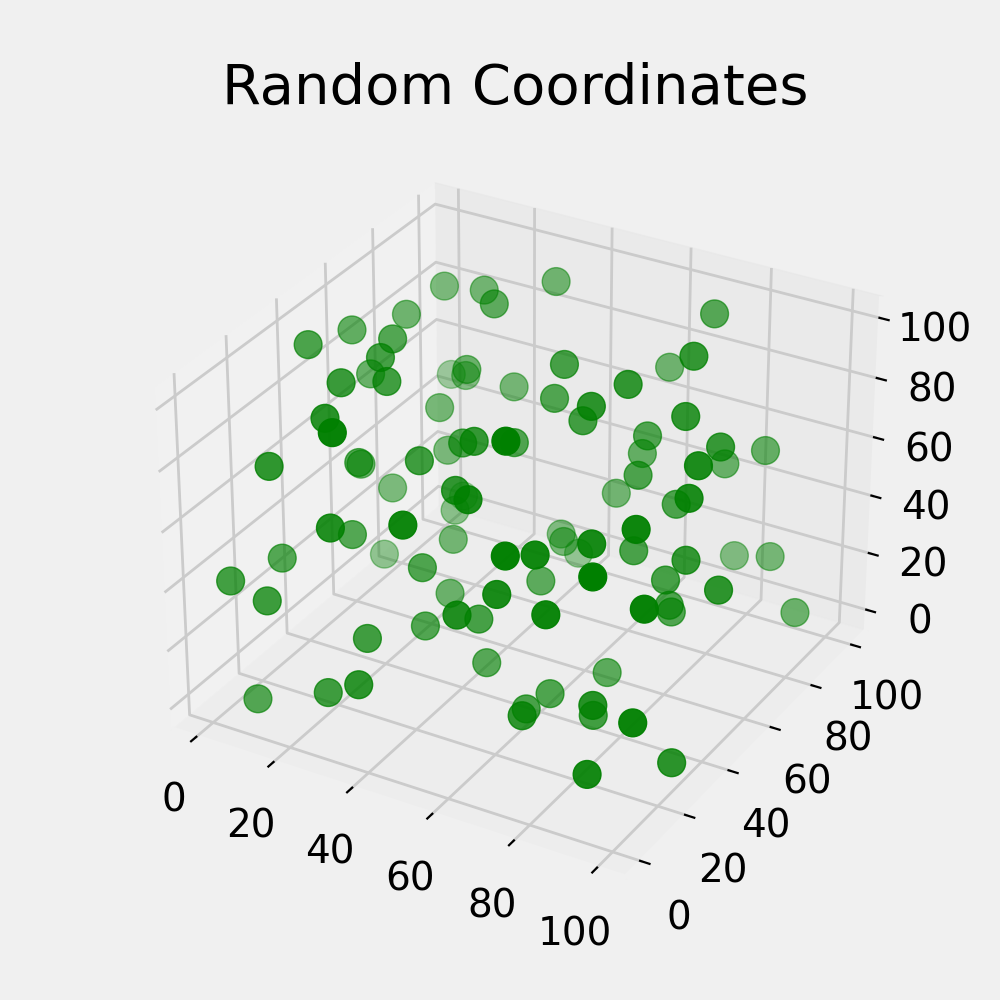

In [21]:
fig = plt.figure(figsize = (5, 5)) 
ax = plt.axes(projection ="3d") 

ax.scatter3D(xs, ys, zs, s=100, color = "green"); 
plt.title("Random Coordinates") 
plt.show() 

In [22]:
def translate_all_coords_in_z(coordinates, amount):
    """Shift all the coordinates by `amount` in the z direction"""
    for coord in coordinates:
        coord.translate_z(amount)
        
    return coordinates

In [23]:
coordinates_shifted = translate_all_coords_in_z(coordinates, 100)

x_shifted, y_shifted, z_shifted = coordinates_as_arrays(coordinates_shifted)

<IPython.core.display.Javascript object>


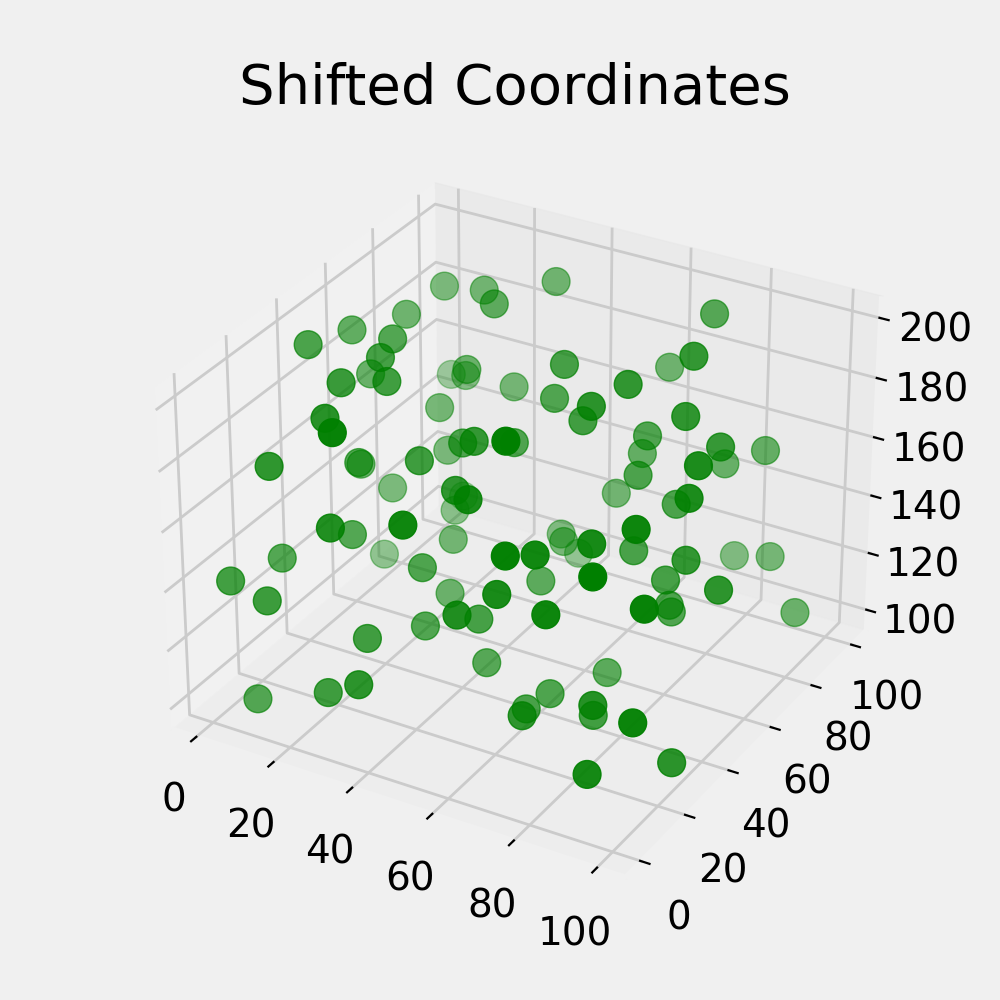

In [24]:
fig = plt.figure(figsize = (5, 5)) 
ax = plt.axes(projection ="3d") 

ax.scatter3D(
    x_shifted,
    y_shifted,
    z_shifted,
    s=100, 
    color = "green"
);

plt.title("Shifted Coordinates") 
plt.show() 